In [12]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



In [13]:
print(train_data[0])
print(train_labels[0])

print(max([max(sequence) for sequence in train_data]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
9999


In [16]:
#vectorizing input data
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [17]:
#vectorizing labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

In [23]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

In [24]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
#training the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
       partial_y_train,
       epochs=20,
       batch_size=512,
       validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.0151 - acc: 0.9967 - val_loss: 0.5969 - val_acc: 0.8676
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0108 - acc: 0.9987 - val_loss: 0.6137 - val_acc: 0.8692
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0117 - acc: 0.9978 - val_loss: 0.6330 - val_acc: 0.8690
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0051 - acc: 0.9998 - val_loss: 0.6572 - val_acc: 0.8674
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0071 - acc: 0.9993 - val_loss: 0.6809 - val_acc: 0.8685
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0085 - acc: 0.9977 - val_loss: 0.6974 - val_acc: 0.8679
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0031 - acc: 0.9999 - val_loss: 0.7173 - val_acc: 0.8667
Epoch 8/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0091 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


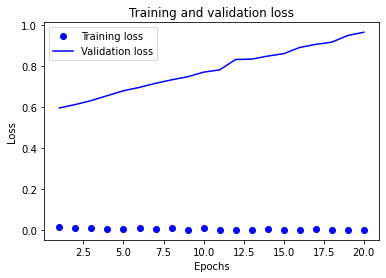

In [32]:
import matplotlib.pyplot as plt

#plotting training and validation loss

history_dict = history.history
print(history_dict.keys())

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

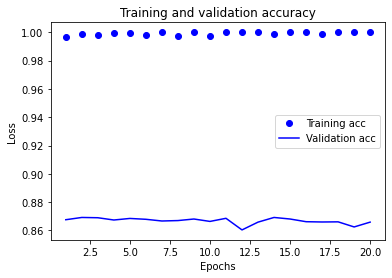

In [34]:
#plotting training and validation accuracy

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 8ms/step - loss: 0.5021 - accuracy: 0.8128
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.3058 - accuracy: 0.8954
Epoch 3/4
49/49 [==============================] - 0s 9ms/step - loss: 0.2363 - accuracy: 0.9142
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3121 - accuracy: 0.8725


In [36]:
print(results)

[0.31212228536605835, 0.8724799752235413]
